# Logistic Regression

## Prediction Model: Sigmoid
#### $S(z) = \frac{1}{1+e^{-z}}, z = mx + c$
#### z is function input, $z=mx + c$
Return: probability
Decision Boundary: <br>
$p \ge 0.5, class = 1$ <br>
$p \lt 0.5, class = 0$

## Cost Function: Cross Entropy (Log Loss)
### $J = \frac{1}{n}\sum\limits_{i=1}^{n} [y * \log(\hat{y}) + (1-y) * \log(1-\hat{y})]$

## Optimization function: Gradient Descent in Cross Entropy
### Derivative of cross entropy for m
Cost function (cross entropy): $J = \sum\limits_{i=1}^{n} [y * \log(a) + (1-y) * \log(1-a)]$ <br>
Sigmoid: $\hat{y} = \frac{1}{1+e^{-z}}$ <br>
parameter: $z = mx + c$ <br>
$\frac{dJ}{dm} = \frac{dJ}{d\hat{y}} * \frac{d\hat{y}}{dz} * \frac{dz}{dm}$ <br>
$\frac{dJ}{d\hat{y}} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$ ------
$\frac{da}{dz} = \hat{y}*(1-\hat{y})$ ------
$\frac{dz}{dm} = x$ <br>
$\frac{dJ}{dm} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}} * \hat{y}*(1-\hat{y}) * x = (\hat{y}-y)*x$
##### Derivative of m = $\frac{1}{n}\sum\limits_{i=1}^{n}(\hat{y}-y)*x$

### Derivative of cross entropy for c
Cost function (cross entropy): $J = \sum\limits_{i=1}^{n} [y * \log(a) + (1-y) * \log(1-a)]$ <br>
Sigmoid: $\hat{y} = \frac{1}{1+e^{-z}}$ <br>
parameter: $z = mx + c$ <br>
$\frac{dJ}{dc} = \frac{dJ}{d\hat{y}} * \frac{d\hat{y}}{dz} * \frac{dz}{dc}$ <br>
$\frac{dJ}{d\hat{y}} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$ ------
$\frac{da}{dz} = \hat{y}*(1-\hat{y})$ ------
$\frac{dz}{dc} = 1$ <br>
$\frac{dJ}{dc} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}} * \hat{y}*(1-\hat{y}) * 1 = (\hat{y}-y)$
##### Derivative of c = $\frac{1}{n}\sum\limits_{i=1}^{n}(\hat{y}-y)$

###### Steps for intercept
1. Take the derivative of the cost function for intercept in it.
2. Pick a random values of intercept for the derivative, eg; 0
3. Calculate the derivative of intercept (slope of intercept)
4. Step size = slope * 0.1(learning rate)
5. New intercept = old intercept - step size
6. Repeat 2-4 until the slope = 0.009 / step size = 0.0009

###### Steps for coef
1. Take the derivative of the cost function for coef in it.
2. Pick a random values of coef for the derivative, eg; 1
3. calculate the derivative of coef (slope of coef)
4. Step size = slope * 0.1(learning rate)
5. New coef = old coef - step size
6. repeat 2-4 until the slope = 0.009 / step size = 0.0009

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.datasets import load_diabetes
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
sns.set(rc={'figure.figsize':(10,8)})

In [3]:
df = pd.read_csv('https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download')

In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
247,15775590,Female,57,122000,1
212,15707596,Female,59,42000,0
397,15654296,Female,50,20000,1
95,15709441,Female,35,44000,0
170,15587013,Male,21,88000,0


### Decision boundary

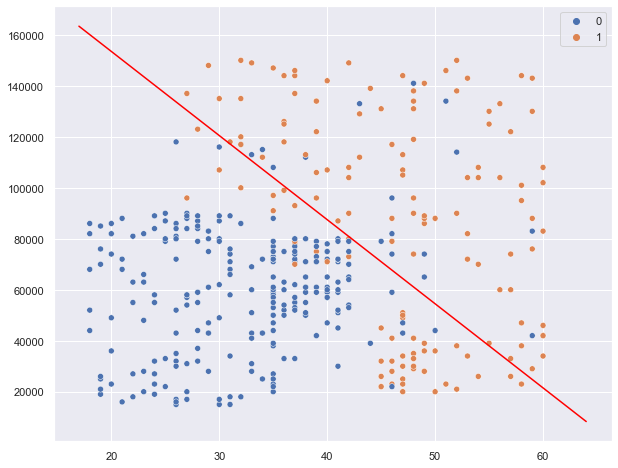

In [6]:
X = np.array(df[['Age', 'EstimatedSalary']])
y = np.array(df['Purchased'])

# Manually plot a decision boundary
x0 = np.arange(17, 65)
x1 = 219500 - 3300*x0

# fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.scatterplot(X[:,0], X[:,1], hue=y)

plt.plot(x0, x1, c='red')

### Prediction Function: Sigmoid

In [7]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

### Normalization

In [8]:
def Normalization(series):
    return (series - min(series)) / (max(series) - min(series))

### Cost function: Cross Entropy

In [9]:
def Cross_Entropy(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    grad = (1/m) * (h - y).T.dot(X)

    return J, grad

In [10]:
df['Age_norm'] = Normalization(df['Age'])
df['Salary_norm'] = Normalization(df['EstimatedSalary'])
X = np.hstack((np.ones((y.shape[0],1)),df[['Age_norm', 'Salary_norm']].values))
y = np.array(df['Purchased']).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1]))

iteration = 0
while True:
    cost, derivative = Cross_Entropy(theta, X, y)
    step_size = derivative * 0.1
    theta = theta - np.squeeze(np.asarray(step_size))

    if iteration%5000 == 0:
        print(f'cost: {cost}')
        print(f'theta: {theta}')
        print(f'derivative: {derivative}')
        print()
        
    if cost < 0.3464:
        print(f'cost: {cost}')
        print(f'theta: {theta}')
        print(f'derivative: {derivative}')
        break
    iteration += 1
print(iteration)

cost: [[0.69314718]]
theta: [-0.01425     0.00076786 -0.00140093]
derivative: [[ 0.1425     -0.00767857  0.01400926]]

cost: [[0.35614232]]
theta: [-5.71219321  7.1960365   3.50604717]
derivative: [[ 0.00349322 -0.00460236 -0.00236342]]

cost: [[0.34810704]]
theta: [-6.79086866  8.61642806  4.23732647]
derivative: [[ 0.00130718 -0.00172239 -0.00088569]]

cost: [[0.34673976]]
theta: [-7.24228226  9.21167591  4.54278541]
derivative: [[ 0.00060508 -0.00079852 -0.00040884]]

cost: [[0.34642562]]
theta: [-7.45955479  9.4985302   4.68948269]
derivative: [[ 0.00030231 -0.00039929 -0.00020396]]

cost: [[0.34639999]]
theta: [-7.48781772  9.53586188  4.70854881]
derivative: [[ 0.00026445 -0.00034933 -0.00017838]]
20999


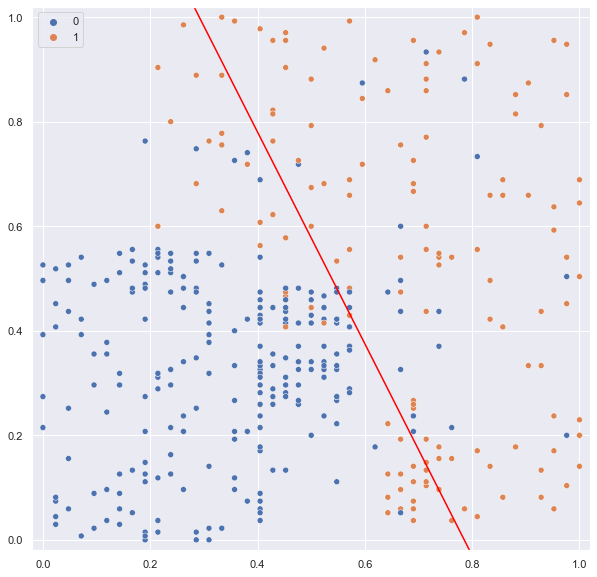

In [13]:
X_plot = np.array(df[['Age_norm', 'Salary_norm']])
y_plot = np.array(df['Purchased'])

# use the last trained theta: [-7.48781772  9.53586188  4.70854881]
# -7.48781772 + 9.53586188 * x0  +  4.70854881 * x1 = 0
# --> x1 = (-7.48781772 + 9.53586188 * x0) / -4.70854881
x0 = np.arange(0, 1, 0.1)
x1 = (-7.48781772 + 9.53586188*x0)/-4.70854881 

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.scatterplot(X_plot[:,0], X_plot[:,1], hue=y_plot)

plt.plot(x0, x1, c='red')
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)